In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import datetime

In [4]:
bike_df = pd.read_csv('data/chicago_2018.csv')
weather = pd.read_csv('data/weather_hourly_chicago.csv')

# change datatype from string to datetime
bike_df['start_time'] = pd.to_datetime(bike_df['start_time'])
bike_df['end_time'] = pd.to_datetime(bike_df['end_time'])

weather["date_time"] = pd.to_datetime(weather["date_time"])
weather.set_index("date_time", inplace=True)

In [5]:
bike_df.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-04-01 00:04:44,2018-04-01 00:13:03,22,171,May St & Taylor St,May St & Cullerton St,3819,Subscriber
1,2018-04-01 00:06:42,2018-04-01 00:27:07,157,190,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,5000,Subscriber
2,2018-04-01 00:07:19,2018-04-01 00:23:19,106,106,State St & Pearson St,State St & Pearson St,5165,Customer
3,2018-04-01 00:07:33,2018-04-01 00:14:47,241,171,Morgan St & Polk St,May St & Cullerton St,3851,Subscriber
4,2018-04-01 00:10:23,2018-04-01 00:22:12,228,219,Damen Ave & Melrose Ave,Damen Ave & Cortland St,5065,Subscriber


In [6]:
check = datetime.datetime(2018, 12, 31, 21)
weather[weather.index == check]
# -> Apparently there are some values missing



,max_temp,min_temp,precip
date_time,,,


KeyError: 'avg_temp'

In [7]:
hourly_demand = bike_df[["start_time", "bike_id"]].groupby(pd.Grouper(key="start_time", freq="H")).count()
hourly_demand.rename(columns={"bike_id": "demand"}, index={"start_time": "hour"}, inplace=True)
hourly_demand

,demand
start_time,
2018-01-01 00:00:00,7
2018-01-01 01:00:00,15
2018-01-01 02:00:00,10
2018-01-01 03:00:00,2
2018-01-01 04:00:00,2
...,...
2018-12-31 19:00:00,41
2018-12-31 20:00:00,28
2018-12-31 21:00:00,22


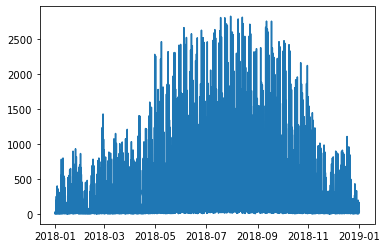

In [8]:
plt.plot(hourly_demand)

In [46]:
# One possible dependent variable is the matching weather
joined = hourly_demand.join(weather, on="start_time")
joined

,demand,max_temp,min_temp,precip
start_time,,,,
2018-01-01 00:00:00,7,-13.9,-13.9,0.0
2018-01-01 01:00:00,15,-15.0,-15.0,0.0
2018-01-01 02:00:00,10,-15.6,-15.6,0.0
2018-01-01 03:00:00,2,-16.7,-16.7,0.0
2018-01-01 04:00:00,2,-17.2,-17.2,0.0
...,...,...,...,...
2018-12-31 19:00:00,41,3.3,3.3,1.0
2018-12-31 20:00:00,28,3.9,3.3,1.0
2018-12-31 21:00:00,22,NaN,NaN,NaN


In [10]:
joined[joined["max_temp"].isnull()]

,demand,max_temp,min_temp,precip
start_time,,,,
2018-01-03 11:00:00,71,NaN,NaN,NaN
2018-01-07 12:00:00,92,NaN,NaN,NaN
2018-01-07 22:00:00,21,NaN,NaN,NaN
2018-01-08 01:00:00,5,NaN,NaN,NaN
2018-01-08 08:00:00,552,NaN,NaN,NaN
...,...,...,...,...
2018-12-29 22:00:00,17,NaN,NaN,NaN
2018-12-30 03:00:00,4,NaN,NaN,NaN
2018-12-30 12:00:00,159,NaN,NaN,NaN


In [52]:
joined[joined["max_temp"].isnull()].index.map(lambda i: print(i))

DatetimeIndex(['2018-01-03 11:00:00', '2018-01-07 12:00:00',
               '2018-01-07 22:00:00', '2018-01-08 01:00:00',
               '2018-01-08 08:00:00', '2018-01-08 13:00:00',
               '2018-01-09 14:00:00', '2018-01-09 19:00:00',
               '2018-01-10 02:00:00', '2018-01-10 07:00:00',
               ...
               '2018-12-29 03:00:00', '2018-12-29 07:00:00',
               '2018-12-29 10:00:00', '2018-12-29 12:00:00',
               '2018-12-29 20:00:00', '2018-12-29 22:00:00',
               '2018-12-30 03:00:00', '2018-12-30 12:00:00',
               '2018-12-31 16:00:00', '2018-12-31 21:00:00'],
              dtype='datetime64[ns]', name='start_time', length=623, freq=None)
2018-01-03 11:00:00
2018-01-07 12:00:00
2018-01-07 22:00:00
2018-01-08 01:00:00
2018-01-08 08:00:00
2018-01-08 13:00:00
2018-01-09 14:00:00
2018-01-09 19:00:00
2018-01-10 02:00:00
2018-01-10 07:00:00
2018-01-10 09:00:00
2018-01-10 11:00:00
2018-01-10 14:00:00
2018-01-10 18:00:00
2018-01-10

Index([None, None, None, None, None, None, None, None, None, None,
       ...
       None, None, None, None, None, None, None, None, None, None],
      dtype='object', name='start_time', length=623)

In [15]:
joined = joined[joined["max_temp"].notnull()]
joined["avg_temp"] = (joined["min_temp"] + joined["max_temp"]) / 2
joined["weekday"] = joined.index.map(lambda dt: dt.weekday())

,demand,max_temp,min_temp,precip,avg_temp,weekday,isRaining
start_time,,,,,,,


In [29]:
joined["isRaining"] = joined["precip"] != 0

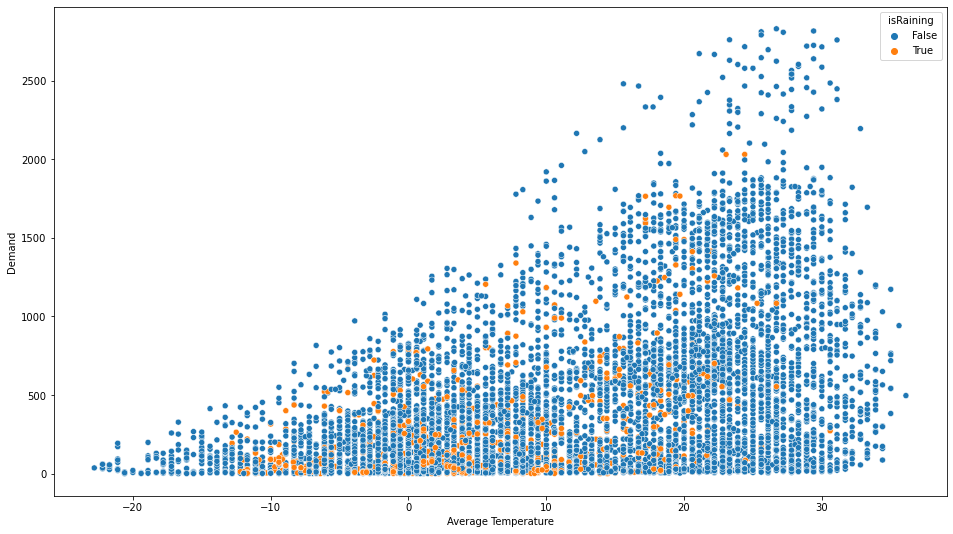

In [30]:
fig, ax = plt.subplots(figsize=(16, 9))

x = joined["avg_temp"]
y = joined["demand"]

sns.scatterplot(x = x, y = y, hue=joined["isRaining"])
# ax.scatter(x, y)
ax.set_xlabel("Average Temperature")
ax.set_ylabel("Demand")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression

In [33]:
X = joined[["avg_temp", "isRaining"]]
y = joined[["demand"]]

In [37]:
lin_temp_precip = LinearRegression()
lin_temp_precip.fit(X, y)
lin_temp_precip.coef_, lin_temp_precip.intercept_

(array([[ 17.40194435, -89.56062857]]), array([234.39949755]))

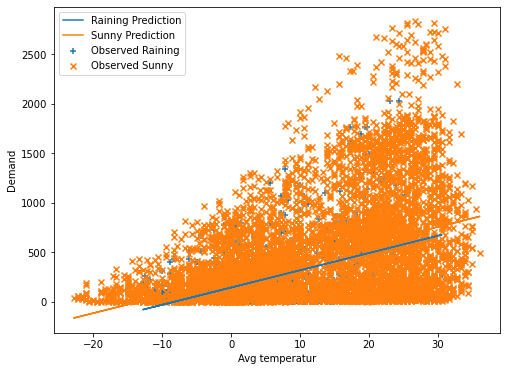

In [40]:
X_raining = X[X["isRaining"]==True]
X_sunny = X[X["isRaining"]==False]

# predict weekends and weekdays seperately
y_pred_raining = lin_temp_precip.predict(X_raining)
y_pred_sunny = lin_temp_precip.predict(X_sunny)

plt.figure(figsize = (8,6))

plt.scatter(X_raining["avg_temp"], 
            joined[joined["isRaining"]==True]["demand"], 
            marker="+", label="Observed Raining",
           zorder=1)

plt.scatter(X_sunny["avg_temp"], 
            joined[joined["isRaining"]==False]["demand"], 
            marker="x", label="Observed Sunny",
           zorder=1)

plt.plot(X_raining["avg_temp"], 
         y_pred_raining, 
         label="Raining Prediction", zorder=2)
plt.plot(X_sunny["avg_temp"], 
         y_pred_sunny, 
         label="Sunny Prediction", zorder=2)

plt.xlabel("Avg temperatur")
plt.ylabel("Demand")

plt.legend()
plt.show()

### Is Raining

Next we will look into the correlation of demand and precipitation

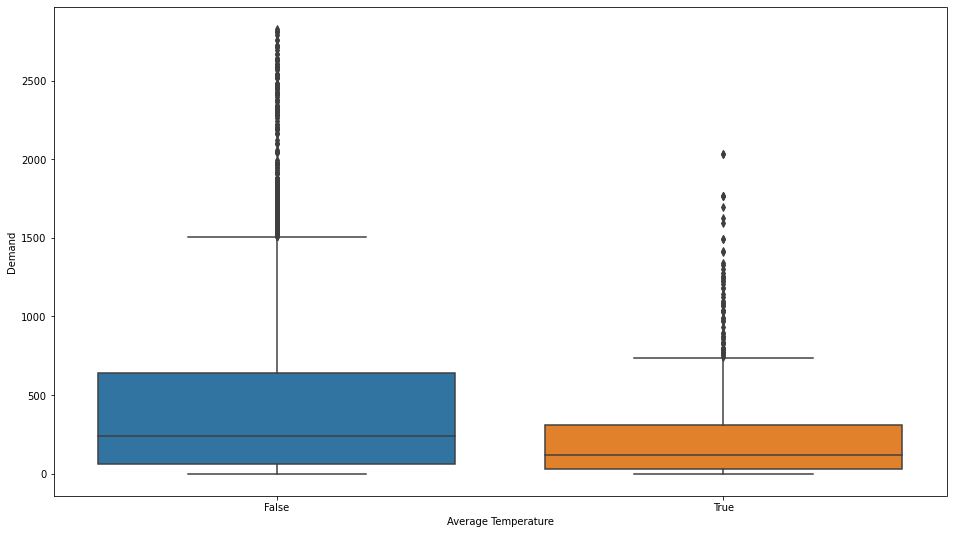

In [81]:
fig, ax = plt.subplots(figsize=(16, 9))

x = joined["isRaining"]
y = joined["demand"]

sns.boxplot(x = x, y = y)
# ax.scatter(x, y)
ax.set_xlabel("Average Temperature")
ax.set_ylabel("Demand")
plt.show()

In [ ]:
# Next we will look into general time realted structures vs demand
